In [21]:
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import scipy
from scipy.stats.mstats import winsorize

df = pd.read_csv(r'glm.csv')
df_adj = pd.read_csv(r'glm_adj.csv')
print(df)
print(df_adj)

   Unnamed: 0  Estimate  Std. Error   z value  Pr(>|z|)
0        X349  0.052351    0.054814  0.955067  0.339544
1        X124  0.048599    0.061804  0.786338  0.431670
2        X282  0.014807    0.090719  0.163215  0.870349
3        X294 -0.032072    0.090046 -0.356173  0.721711
4        X549 -0.009427    0.055581 -0.169605  0.865321
..        ...       ...         ...       ...       ...
95       X580  0.010935    0.073659  0.148450  0.881988
96        X91 -0.023300    0.066609 -0.349810  0.726482
97       X518  0.185612    0.491277  0.377815  0.705568
98       X223 -0.000316    0.057839 -0.005456  0.995647
99       X511  0.055144    0.053548  1.029791  0.303108

[100 rows x 5 columns]
   Unnamed: 0  adjusted_mle       std   z.value   p.value
0        X349      0.044636  0.098001  0.455464  0.648775
1        X124      0.041437  0.110814  0.373931  0.708456
2        X282      0.012625  0.163159  0.077376  0.938324
3        X294     -0.027345  0.160762 -0.170099  0.864933
4        X549 

In [2]:
scatter = pd.DataFrame()
scatter.insert(0,'x',df['Estimate'])
scatter.insert(1,'y', df_adj['adjusted_mle'])
print(scatter)

           x         y
0   0.052351  0.044636
1   0.048599  0.041437
2   0.014807  0.012625
3  -0.032072 -0.027345
4  -0.009427 -0.008038
..       ...       ...
95  0.010935  0.009323
96 -0.023300 -0.019867
97  0.185612  0.158258
98 -0.000316 -0.000269
99  0.055144  0.047017

[100 rows x 2 columns]


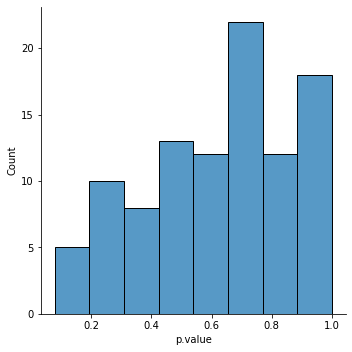

In [76]:
s = sns.displot(df,x = "Pr(>|z|)")
s.set(xlabel = 'p.value')
s.set_titles('p-values for the unadjusted GLM')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

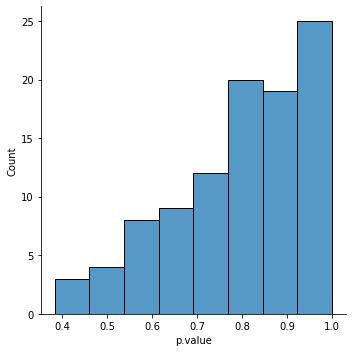

In [75]:
sns.displot(df_adj,x="p.value")
s.set_title('p-values for the adjusted GLM')

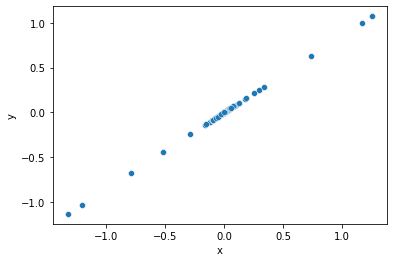

In [68]:
sns.scatterplot(data = scatter, x = 'x', y = 'y')

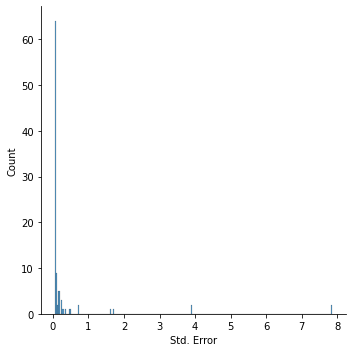

In [67]:
sns.displot(df,x = "Std. Error")

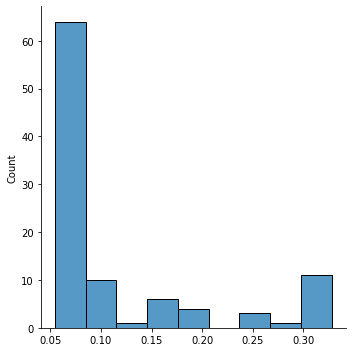

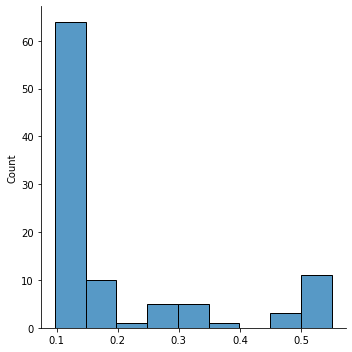

In [70]:
a = df_adj["std"]
b = df["Std. Error"]
aw = winsorize(a, limits = [0.1,0.1])
bw = winsorize(b,limits = [0.1,0.1])

In [73]:
sigma_ratio = a/b

In [64]:
scatter_sigma = pd.DataFrame()
one_to_hundred = pd.Series(range(1,101))
scatter_sigma.insert(0,'x',one_to_hundred)
scatter_sigma.insert(1,'y',sigma_ratio)
print(scatter_sigma)

      x         y
0     1  1.787883
1     2  1.792988
2     3  1.798508
3     4  1.785336
4     5  1.798257
..  ...       ...
95   96  1.794196
96   97  1.790791
97   98  1.796769
98   99  1.779988
99  100  1.795742

[100 rows x 2 columns]


Text(0.5, 1.0, 'Ratios of $\\dfrac{\\sigma_*}{\\sigma}$')

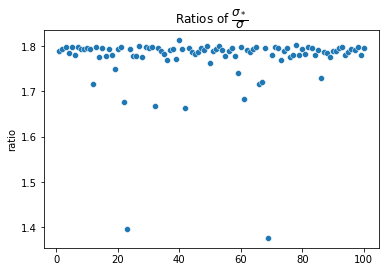

In [65]:
s=sns.scatterplot(data = scatter_sigma, x='x', y = 'y')
s.set(xlabel = '', ylabel = 'ratio')
s.set_title('Ratios of $\dfrac{\sigma_*}{\sigma}$')